In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
df_cust = pd.read_csv('customers.csv')

In [122]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,NaN,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,NaN,Married


# DATA CLEANING

## Replacing null values

In [123]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [124]:
df_cust[df_cust.annual_income.isna()]


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [125]:
grouped_occupation_median = df_cust.groupby('occupation')['annual_income'].median()
grouped_occupation_median


occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [126]:
df_cust['annual_income'] = df_cust.apply(
    lambda row:  grouped_occupation_median[row['occupation']]if pd.isnull(row['annual_income']) else row['annual_income'],axis=1
)

In [127]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [128]:
df_cust.iloc[[14,23]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
23,24,Anika Sen,Female,20,City,Freelancer,58263.0,Married


## Treating outliers

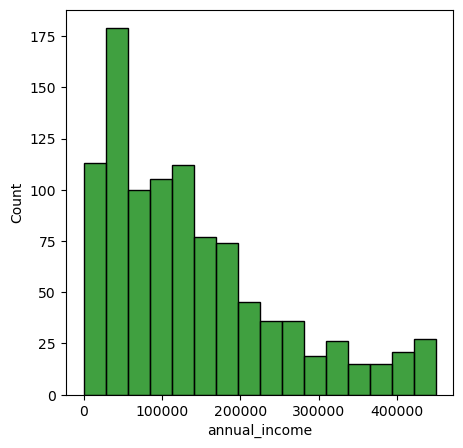

In [129]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=False,label='data',color='green')
plt.show()

In [130]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [131]:
df_cust[df_cust.annual_income < 100]
#buisness manager requirmen

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [132]:
grouped_occupation_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [133]:
for index, row in df_cust.iterrows():
    if row["annual_income"]<100:
        df_cust.at[index, "annual_income"] = grouped_occupation_median[row['occupation']]


In [134]:
df_cust[df_cust.annual_income < 100]
#buisness manager requirment

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


# DATA VISUALIZATION

In [135]:
grouped_occupation_mean = df_cust.groupby('occupation')['annual_income'].mean()
grouped_occupation_mean


occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [136]:
grouped_occupation_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [137]:
grouped_occupation_mean.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

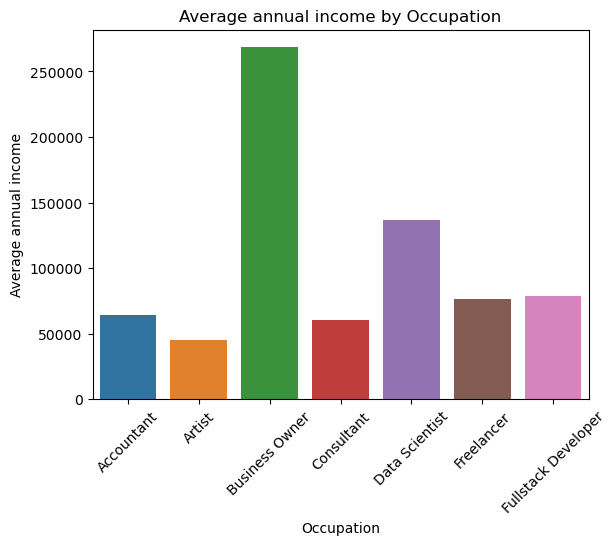

In [138]:
sns.barplot(x=grouped_occupation_mean.index,y=grouped_occupation_mean.values,palette="tab10",dodge=False,
    legend=False,hue=grouped_occupation_mean.index)
plt.xticks(rotation=45)
plt.title("Average annual income by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average annual income")

plt.show()


In [139]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\160131925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.index,y=avg_income.values,palette="tab10")
C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\160131925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.index,y=avg_income.values,palette="tab10")
C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\160131925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.index,y=avg_income.values,palette="tab10")
C:\Users\abhir\AppData\Local\Temp\ipykernel

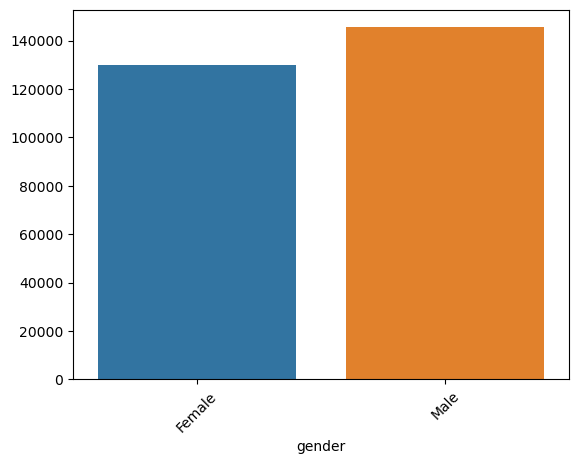

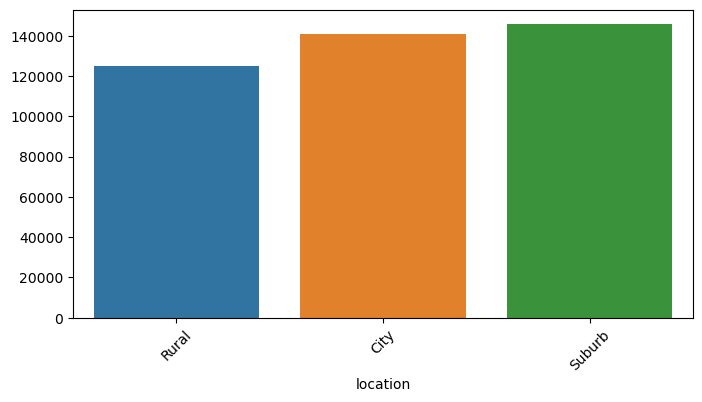

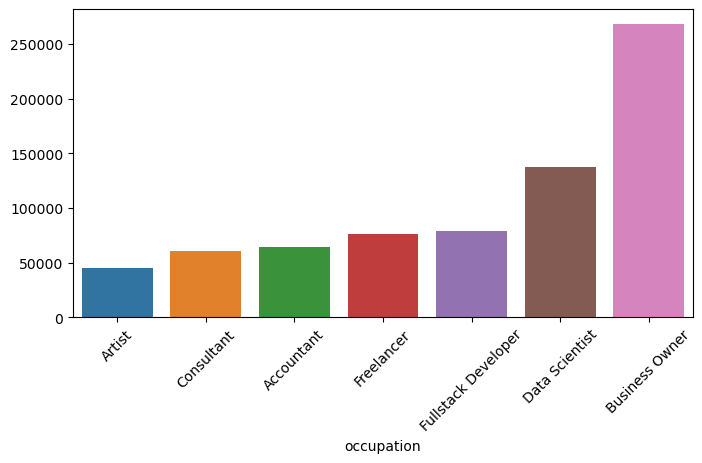

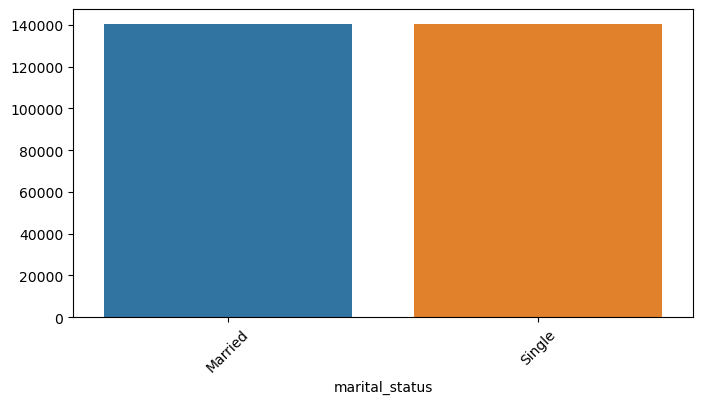

<Figure size 800x400 with 0 Axes>

In [140]:
catergorical_col = ['gender','location','occupation','marital_status']
for col in catergorical_col:
    avg_income = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income.index,y=avg_income.values,palette="tab10")
    plt.xticks(rotation=45)
    plt.figure(figsize=(8,4))
    

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2599691472.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2599691472.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2599691472.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2599691472.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtic

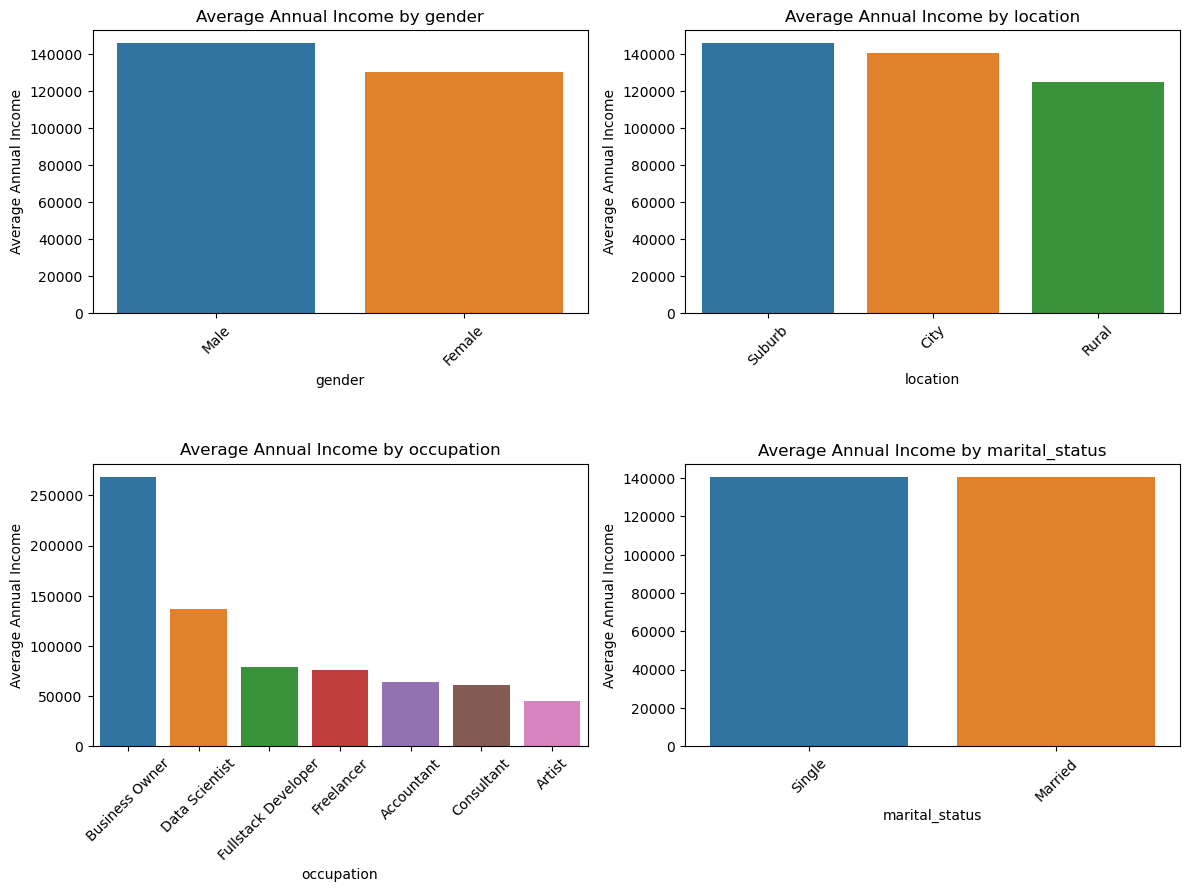

In [141]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, errorbar=None, ax=axes[i], palette='tab10',hue=cat_col)
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [142]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [143]:
outliers = df_cust[(df_cust.age < 18)| (df_cust.age > 80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [144]:
grouped_age = df_cust.groupby('occupation')['age'].median()
grouped_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [145]:
for index, row in outliers.iterrows():
    df_cust.at[index,'age'] = grouped_age[row['occupation']]

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\4018761217.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index,'age'] = grouped_age[row['occupation']]


In [146]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [147]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [148]:
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [149]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

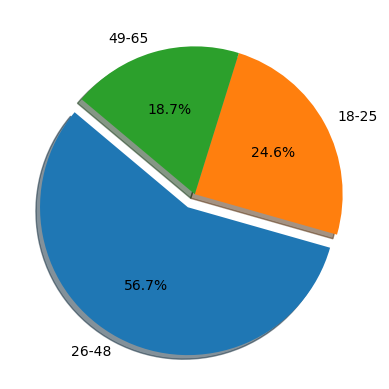

In [150]:
plt.pie(age_group_counts,
       labels = age_group_counts.index,
        explode=(0.1,0,0), 
        autopct='%1.1f%%', 
        shadow=True,
        startangle=140)
plt.show()

In [151]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [152]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [153]:
customer_location_gender = df_cust.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


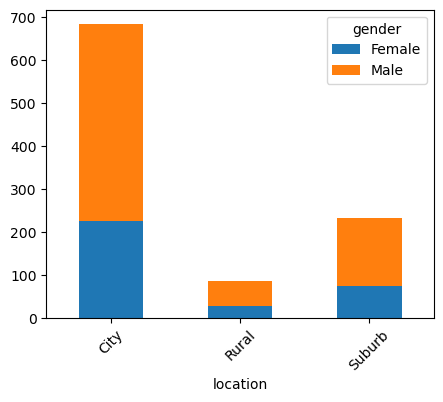

In [154]:
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))
plt.xticks(rotation=45)
plt.show()


In [155]:
df_cs = pd.read_csv("credit_profiles.csv")

In [156]:
df_cs.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [157]:
df_cs.shape

(1004, 6)

In [158]:
df_cs['cust_id'].nunique()

1000

In [159]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [160]:
df_cs_clean_1 = df_cs.drop_duplicates(subset="cust_id",keep="last")
df_cs_clean_1.shape


(1000, 6)

In [161]:
df_cs_clean_1[df_cs_clean_1['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [162]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [163]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [164]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

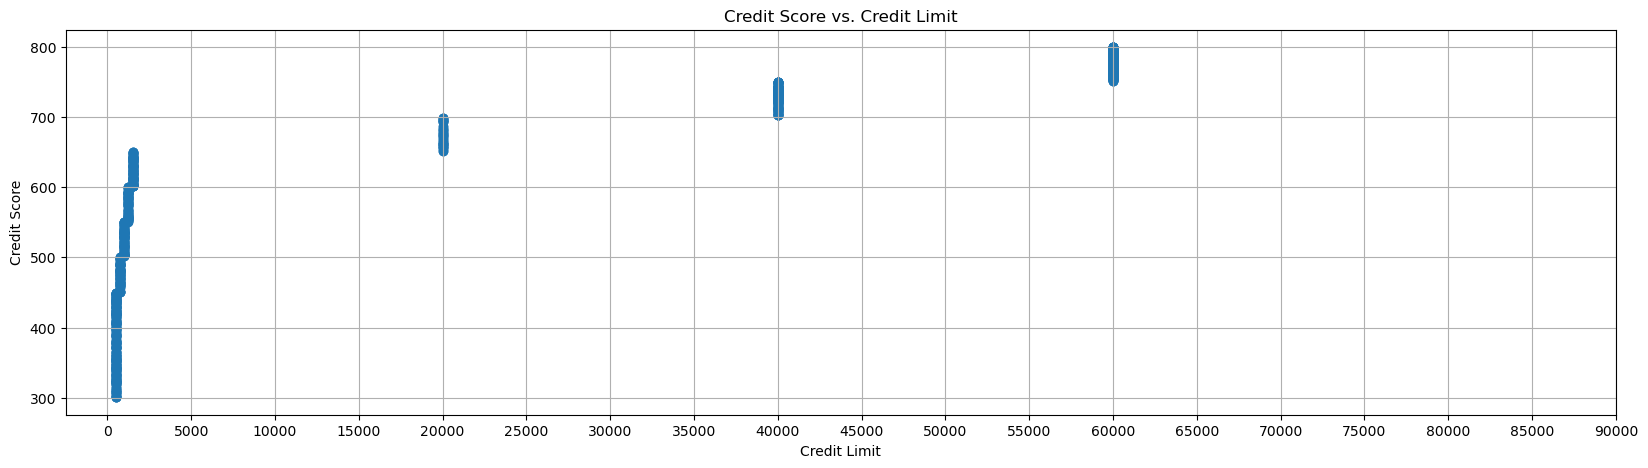

In [165]:
plt.figure(figsize=(20,5))
plt.scatter(df_cs_clean_1.credit_limit,df_cs_clean_1.credit_score)
# Customize the plot
ax = plt.gca()

# Customize the plot
ax.set_title('Credit Score vs. Credit Limit')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Credit Score')

plt.xticks(range(0,90001,5000))
plt.grid(True)

plt.show()

In [166]:
bin_ranges = [300,450,500,550,600,650,700,750,800]
bin_labels = [f"{bin_ranges[i]}-{bin_ranges[i+1]}" for i in range(len(bin_ranges) - 1)]
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins=bin_ranges ,labels=bin_labels ,include_lowest=True ,right = False)
df_cs_clean_1.sample(3)

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2679768050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins=bin_ranges ,labels=bin_labels ,include_lowest=True ,right = False)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
472,473,437,0.457461,179.0,2.0,500.0,300-450
598,597,799,0.253050,11800.0,0.0,60000.0,750-800
128,129,302,0.617242,221.0,4.0,500.0,300-450


In [167]:
df_cs_clean_1[df_cs_clean_1.credit_score_range=='700-750']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-750
4,5,708,0.586151,18090.0,2.0,40000.0,700-750
6,7,747,0.523965,15544.0,4.0,40000.0,700-750
16,17,702,0.894423,18444.0,0.0,40000.0,700-750
27,28,729,0.149748,3453.0,2.0,40000.0,700-750
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-750
970,967,739,0.845474,23929.0,4.0,40000.0,700-750
991,988,739,0.435891,9283.0,4.0,40000.0,700-750
994,991,709,0.718484,15473.0,4.0,40000.0,700-750


In [168]:
mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\125336137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-450,500.0
1,450-500,750.0
2,500-550,1000.0
3,550-600,1250.0
4,600-650,1500.0
5,650-700,20000.0
6,700-750,40000.0
7,750-800,60000.0


In [169]:
df_cs_clean_2 = pd.merge(df_cs_clean_1,mode_df,on = "credit_score_range",suffixes=('', '_mode'))

In [170]:
df_cs_clean_2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-600,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-600,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-800,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-550,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-750,40000.0


In [171]:
df_cs_clean_3 = df_cs_clean_2.copy()

In [172]:
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'],inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\620328429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'],inplace=True)


In [173]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [174]:
df_cs_clean_3[df_cs_clean_3.cust_id==117]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
116,117,372,0.604427,252.0,4.0,500.0,300-450,500.0


In [175]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: xlabel='outstanding_debt'>

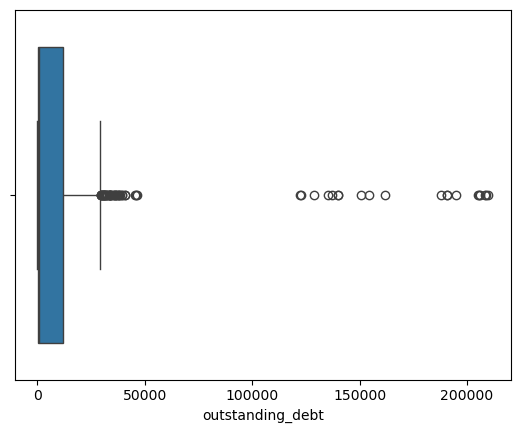

In [176]:
sns.boxplot(x=df_cs_clean_3.outstanding_debt)

In [177]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-600,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-650,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-800,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-750,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-750,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-450,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-750,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-750,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-800,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-450,500.0


In [178]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit,'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [179]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit,'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [180]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [181]:
df_cs_clean_3.loc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,7,747,0.523965,15544.0,4.0,40000.0,700-750,40000.0
12,13,476,0.822498,318.0,3.0,750.0,450-500,750.0


In [182]:
df_merged = df_cust.merge(df_cs_clean_3,on='cust_id',how = "inner")

In [183]:
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-600,1250.0
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-800,60000.0
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-550,1000.0
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-750,40000.0


In [184]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']
correlation_matrix = df_merged[numerical_cols].corr()

In [185]:
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


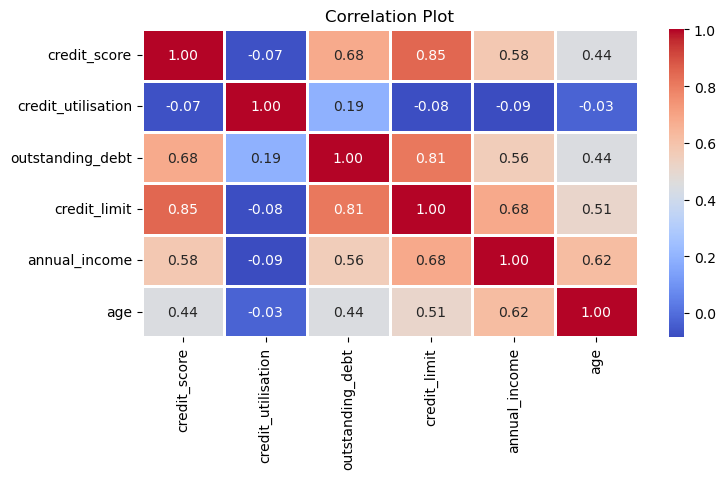

In [186]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

In [187]:
df_trans = pd.read_csv("transactions.csv")

In [188]:
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,NaN,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [189]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [190]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [191]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [192]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [193]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

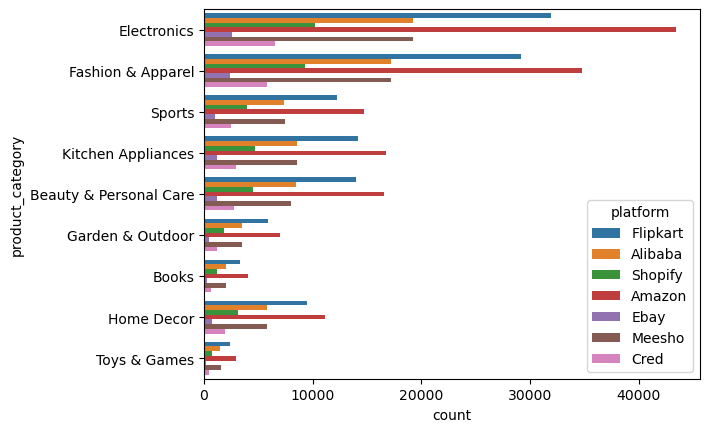

In [194]:
sns.countplot(y="product_category",hue="platform",data = df_trans)

In [195]:
df_trans.platform.mode()[0]

'Amazon'

In [196]:
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2724666882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)


In [197]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [199]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [202]:
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [203]:
df_trans_zero.shape

(4734, 7)

In [207]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [208]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [211]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [214]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [215]:
df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2400713182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)


In [216]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [217]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [221]:
Q1,Q3 = df_trans['tran_amount'].quantile([0.25,0.75])
IQR = Q3 - Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

lower,upper

(-628.0, 1107.0)

In [223]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

999

In [225]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

50000

In [227]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [231]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [232]:
tran_mean_per_category = df_trans_normal.groupby('product_category')['tran_amount'].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [233]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [234]:
df_trans.loc[df_trans_outliers.index,'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\2926673704.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_trans_outliers.index,'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)


In [235]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

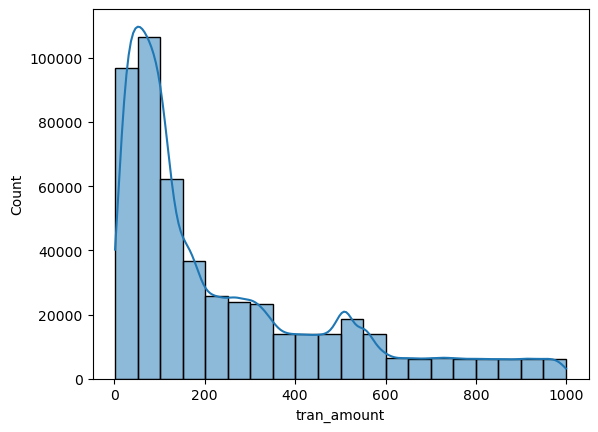

In [236]:
sns.histplot(x='tran_amount',data=df_trans,bins=20,kde=True)

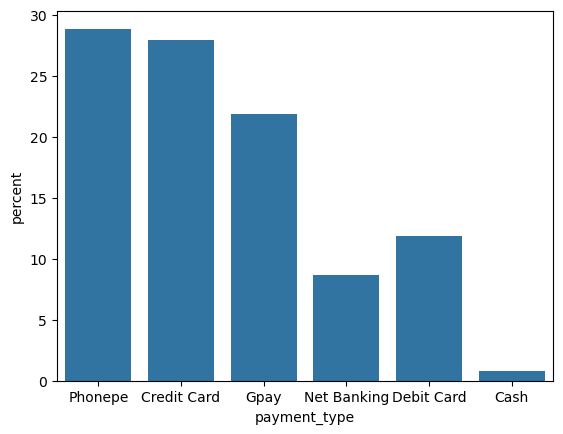

In [238]:
sns.countplot(x=df_trans.payment_type,stat='percent')
plt.show()

In [241]:
df_merged_2 = pd.merge(df_merged,df_trans,on='cust_id',how='inner')
df_merged_2

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-800,60000.0,495592,2023-09-03,63.0,Shopify,Fashion & Apparel,Gpay
499996,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-800,60000.0,495907,2023-09-03,743.0,Alibaba,Electronics,Phonepe
499997,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-800,60000.0,496570,2023-09-04,20.0,Cred,Books,Credit Card
499998,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-800,60000.0,497591,2023-09-04,558.0,Alibaba,Home Decor,Net Banking


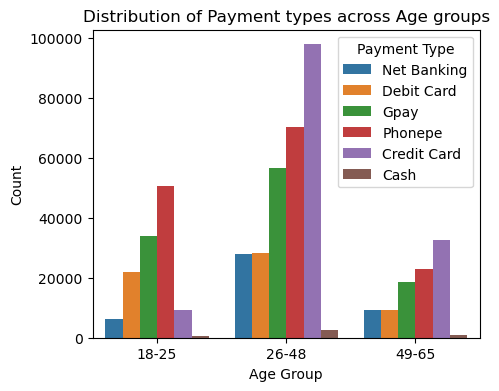

In [243]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df_merged_2.age_group,hue='payment_type',data = df_merged_2)
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

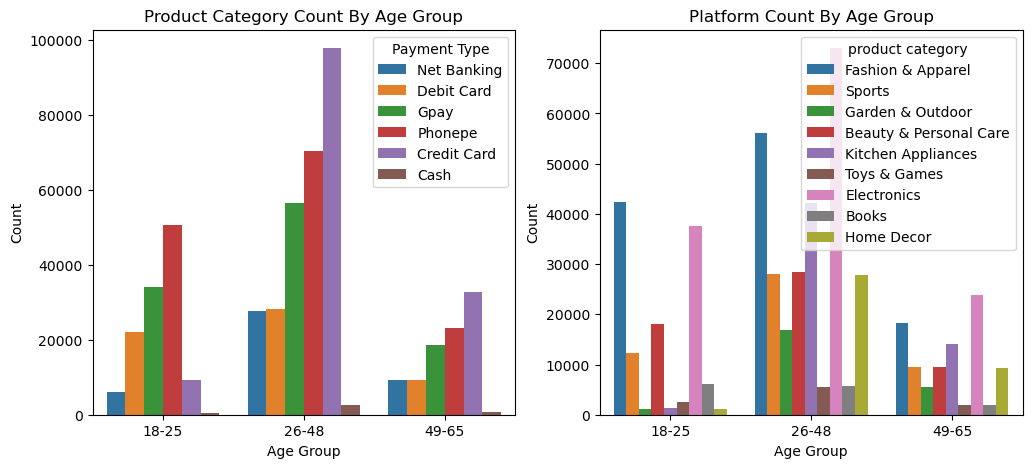

In [252]:
fix, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x=df_merged_2.age_group,hue='payment_type',data = df_merged_2,ax=ax1)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax1.legend(title='Payment Type', loc='upper right')

sns.countplot(x=df_merged_2.age_group,hue='product_category',data = df_merged_2,ax=ax2)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax2.legend(title='product category', loc='upper right')

plt.show()

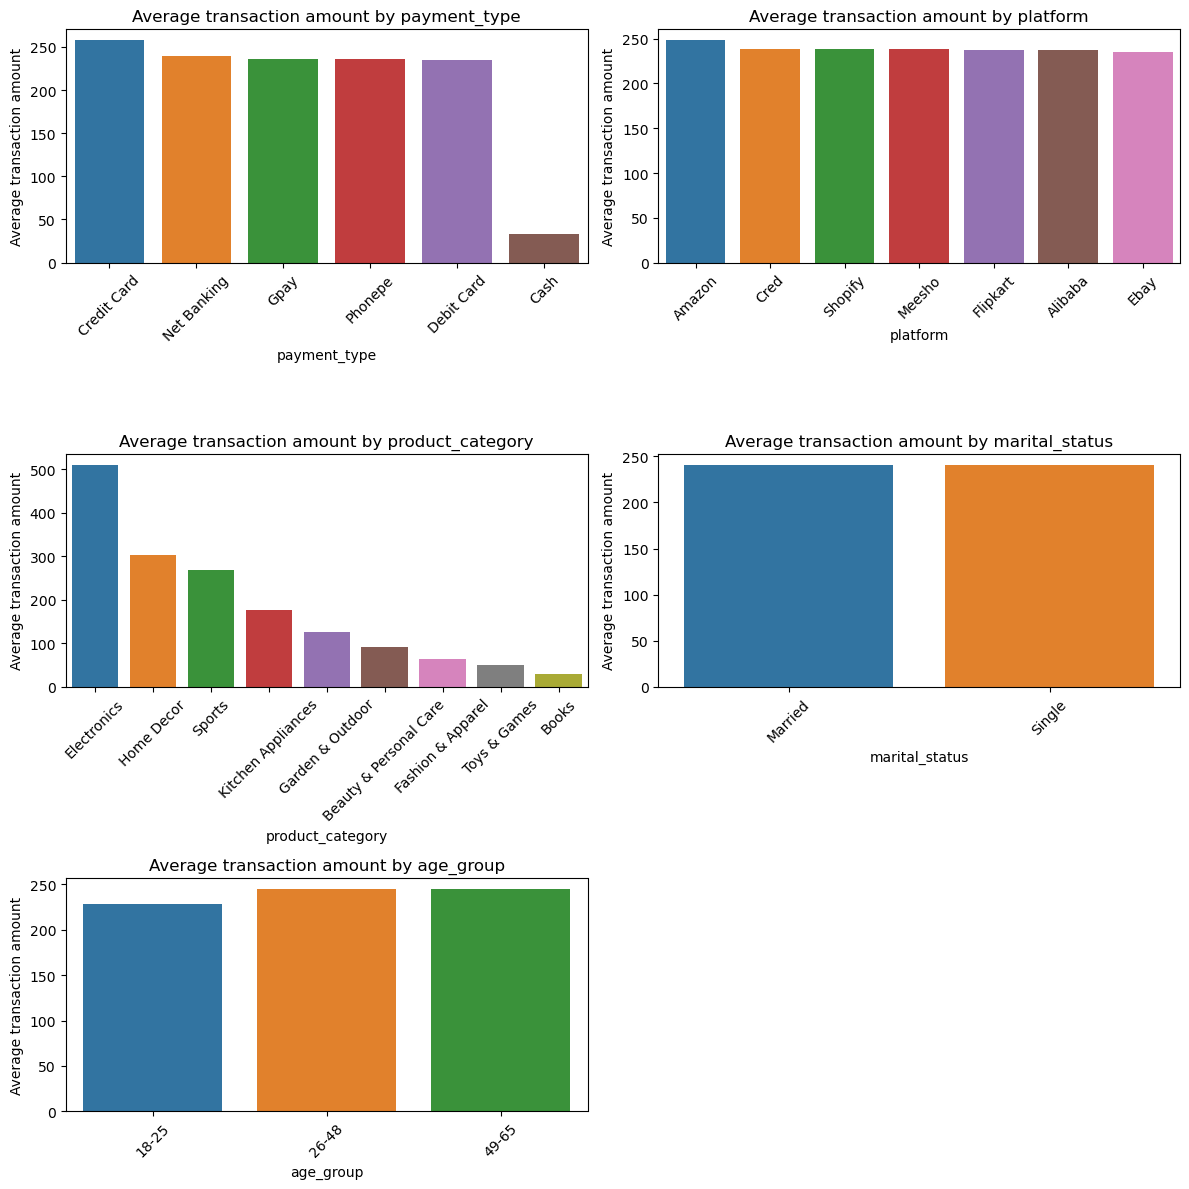

In [254]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average transaction amount for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col, observed=False)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'tran_amount' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, errorbar=None, ax=axes[i], hue=cat_col, palette='tab10', legend=False)
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


In [255]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

C:\Users\abhir\AppData\Local\Temp\ipykernel_16996\3918136653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


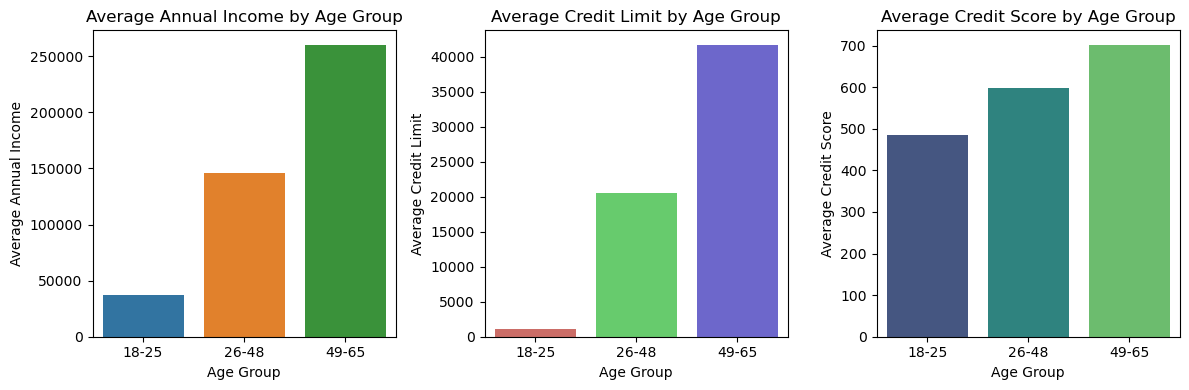

In [257]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, hue='age_group', palette='tab10', ax=ax1, legend=False)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, hue='age_group', palette='hls', ax=ax2, legend=False)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, hue='age_group', palette='viridis', ax=ax3, legend=False)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


<h2>PHASE2<h2>

In [1]:
#import required libraries
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990335

In [3]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


In [5]:
# Loading campaign results data
df = pd.read_csv('avg_transactions_after_campaign.csv')
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29


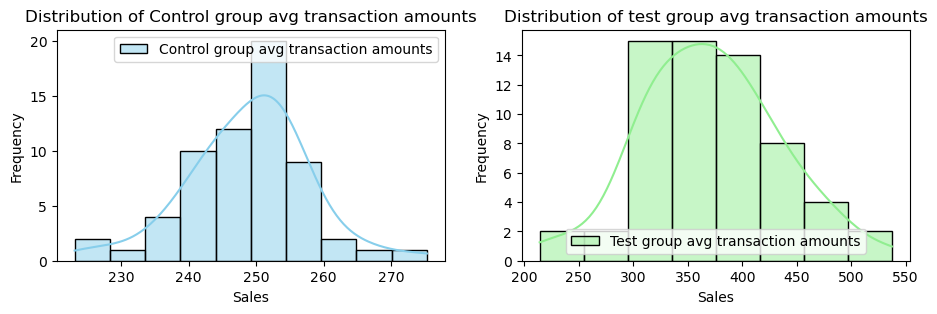

In [6]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

In [18]:
control_mean = df["control_group_avg_tran"].mean().round(2)
control_std = df["control_group_avg_tran"].std()
control_mean, control_std 

(248.94, 9.137869049553624)

In [12]:
test_mean = df["test_group_avg_tran"].mean().round(2)
test_std = df["test_group_avg_tran"].std()
test_mean, test_std

(370.54, 63.25415113953285)

In [13]:
sample_size = df.shape[0]
sample_size

62

In [14]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

14.98149921511251

In [16]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [17]:
Z_score > critical_z_value 

True